Importing libraries (Ill import libraries gradually during analysis)

In [1]:
import geopandas
import geocoder
import math
# initialize your variable to None
lat_lng_coords = None
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lxml.html as lh
import matplotlib.gridspec as gridspec
import seaborn as sns
import requests
from io import StringIO


Discovering file and putting in a dataframe

In [2]:
orig_url = "https://drive.google.com/file/d/0B7ljSqzqjOkEMEFXdlY1WXN6WUk/view"
file= orig_url.split('/')[-2]
gdriv = 'https://drive.google.com/uc?export=download&id=' + file
print (gdriv)
dwn = requests.get(gdriv).text
raw = StringIO(dwn)
df = pd.read_csv(raw)
df.head(5)

https://drive.google.com/uc?export=download&id=0B7ljSqzqjOkEMEFXdlY1WXN6WUk


,0.3971497,2.1136286
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


Naming my unknown columns to A and B

In [3]:
df.columns = ["A","B"]
df.to_csv(raw, header=["A","B"], index=False)
df.head(5)


,A,B
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


Looking at type, shape and description data and putting the values of each column in an array

In [4]:
df.shape

(1023, 2)

In [5]:
df.A.value_counts() #there repeated data

 0.397150    100
 1.067695      2
-0.065909      2
-0.388084      2
 0.719915      2
            ... 
 1.195399      1
 0.189072      1
-0.315090      1
-0.399864      1
 0.720770      1
Name: A, Length: 912, dtype: int64

In [6]:
leng = len(df)
print(leng)

1023


In [7]:
cdf = df.drop_duplicates(subset=['A', 'B'], keep='first') #cdf - Clean Data Frame
print(cdf) #clean duplication

             A         B
0     0.397150  2.113629
7     0.967562 -0.099246
8     0.061841 -1.333110
9     0.719915 -0.151519
10    0.759443  0.761602
...        ...       ...
1018  0.658949 -1.553537
1019  0.843992  0.612621
1020  0.751561  1.299879
1021  0.906819  0.077444
1022  1.060808 -2.824606

[912 rows x 2 columns]


In [8]:
leng = len(cdf)
print(leng)

912


In [9]:
cdf.A.value_counts() #ok

0.759792    1
0.633239    1
0.644004    1
0.502264    1
0.314107    1
           ..
0.804508    1
0.706459    1
0.091829    1
1.195399    1
0.720770    1
Name: A, Length: 912, dtype: int64

In [10]:
cdf['A']

0       0.397150
7       0.967562
8       0.061841
9       0.719915
10      0.759443
          ...   
1018    0.658949
1019    0.843992
1020    0.751561
1021    0.906819
1022    1.060808
Name: A, Length: 912, dtype: float64

In [11]:
# Checking table, checking array

In [12]:
a = cdf.iloc[:, 0]
b = cdf.iloc[:,1]
L1 = cdf['A'].values.tolist()
L2 = cdf['B'].values.tolist()

#print(a)

In [13]:
# moving to cdf (clean dataframe) to newdf (new dataframe), calling columns of Array

In [14]:
newdf = pd.DataFrame({'Array1': L1,
     'Array2': L2})
print(newdf)

       Array1    Array2
0    0.397150  2.113629
1    0.967562 -0.099246
2    0.061841 -1.333110
3    0.719915 -0.151519
4    0.759443  0.761602
..        ...       ...
907  0.658949 -1.553537
908  0.843992  0.612621
909  0.751561  1.299879
910  0.906819  0.077444
911  1.060808 -2.824606

[912 rows x 2 columns]


In [15]:
newdf.values

array([[ 0.3971497,  2.1136286],
       [ 0.9675616, -0.0992462],
       [ 0.0618409, -1.3331104],
       ...,
       [ 0.7515614,  1.2998793],
       [ 0.906819 ,  0.0774441],
       [ 1.0608076, -2.8246059]])

Trying to understand the data...

In [16]:
newdf.describe(include='all')

,Array1,Array2
count,912.000000,912.000000
mean,0.515829,-0.664430
std,0.371225,1.320709
min,-0.925070,-2.837888
25%,0.344053,-1.620063
50%,0.627949,-1.276303
75%,0.758391,0.231175
max,1.195399,3.096964


In [17]:
newdf.dtypes

Array1    float64
Array2    float64
dtype: object

Plotting clusters

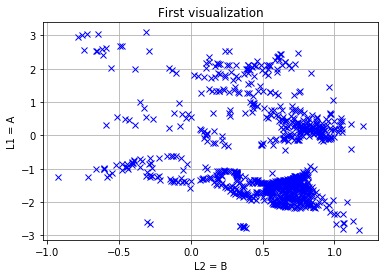

In [18]:
Hopper = plt.axes()
Hopper.set(xlabel='L2 = B', ylabel='L1 = A',
       title='First visualization')
Hopper.grid()

#fig.savefig("test.png")
Hopper.plot(newdf.Array1, newdf.Array2, 'x', color='blue');

In [19]:
# L2 below is a map - we can see now that L1 is inverted

Points_plotted: 912


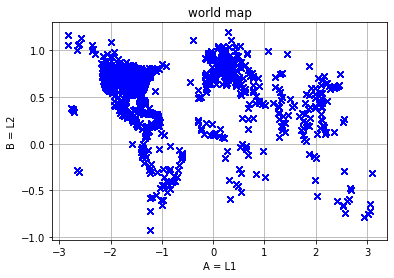

In [20]:
Hopper = plt.axes()
Hopper.set(xlabel='A = L1', ylabel='B = L2',
       title='world map')
Hopper.grid()

#fig.savefig("test.png")
count = 0
for i in newdf.Array1:
    Hopper.plot(newdf.Array2, newdf.Array1, 'x', color='blue')
    count = count +1
print('Points_plotted:',count) #check number points plotted

#### Converting to scale and Mapping

Importing to CRS (coordinate Reference Systems) - WGS84

In [21]:
#Bringing the world from goepandas Natural earth Check geopandas documentantion

In [22]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [23]:
#checking what CRS is use for world:

In [24]:
world.crs

{'init': 'epsg:4326'}

In [25]:
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

In [26]:
#world = world.to_crs(epsg=3395)

In [27]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


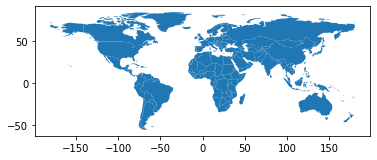

In [28]:
world.plot();

Converting Puzzle map to epsg, then add world mercator map in the background

In [29]:
#Data as pair coordinates // convA and convB transformation to rad () // L1c, L2c are arrays from data conv

In [30]:
convA=newdf['Array1']*180/(math.pi) 
convB=newdf['Array2']*180/(math.pi)
L1c = convB.values.tolist() #longitude
L2c = convA.values.tolist() #latitude
#print(L1c)

In [31]:
#now I can call Data Frame of coordenates (dfcoord), and use Latitude and Longitude

In [32]:
dfcoord = pd.DataFrame({'Longitude': L1c,
     'Latitude': L2c})
print(dfcoord)

      Longitude   Latitude
0    121.101998  22.755002
1     -5.686388  55.437196
2    -76.381600   3.543223
3     -8.681388  41.248103
4     43.636603  43.512902
..          ...        ...
907  -89.011102  37.755002
908   35.100603  48.357202
909   74.477598  43.061296
910    4.437220  51.956901
911 -161.837997  60.779798

[912 rows x 2 columns]


In [33]:
dfcoord.head(5) 

,Longitude,Latitude
0,121.101998,22.755002
1,-5.686388,55.437196
2,-76.381600,3.543223
3,-8.681388,41.248103
4,43.636603,43.512902


In [34]:
dfcoord.values

array([[ 121.10199824,   22.75500164],
       [  -5.68638839,   55.4371961 ],
       [ -76.38159954,    3.54322257],
       ...,
       [  74.47759777,   43.06129626],
       [   4.43722008,   51.95690148],
       [-161.83799686,   60.77979836]])

In [35]:
# print('Array of Latitude:',L1c)

In [36]:
#Plotting new world map with dataframe of coordenates

Points_plotted: 912


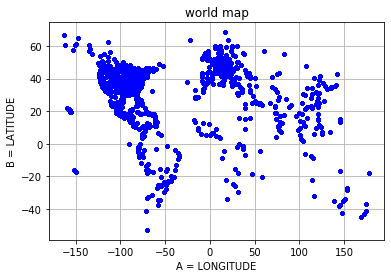

In [37]:
Hopper = plt.axes()
Hopper.set(xlabel='A = LONGITUDE', ylabel='B = LATITUDE',
       title='world map')
Hopper.grid()

#fig.savefig("test.png")
count = 0
for i in newdf.Array1:
    Hopper.plot(dfcoord.Longitude,dfcoord.Latitude, '.', color='blue')
    count = count +1
print('Points_plotted:',count) #check number points plotted

In [38]:
#Convert dataframe of cooordenates in points

In [39]:
gdf = geopandas.GeoDataFrame(
      dfcoord, geometry=geopandas.points_from_xy( 
              dfcoord.Longitude,  dfcoord.Latitude))

In [40]:
print(gdf.head(15))  #decimal degrees

     Longitude   Latitude                     geometry
0   121.101998  22.755002   POINT (121.10200 22.75500)
1    -5.686388  55.437196    POINT (-5.68639 55.43720)
2   -76.381600   3.543223    POINT (-76.38160 3.54322)
3    -8.681388  41.248103    POINT (-8.68139 41.24810)
4    43.636603  43.512902    POINT (43.63660 43.51290)
5    -2.849720  53.333599    POINT (-2.84972 53.33360)
6   -13.605198  28.945501   POINT (-13.60520 28.94550)
7    23.411434  42.696695    POINT (23.41143 42.69669)
8   114.088995 -22.235598  POINT (114.08899 -22.23560)
9   -72.035102   7.565381    POINT (-72.03510 7.56538)
10   28.814598  40.976899    POINT (28.81460 40.97690)
11 -149.996002  61.174400  POINT (-149.99600 61.17440)
12    5.374527  51.450097     POINT (5.37453 51.45010)
13  -82.407402  36.475198   POINT (-82.40740 36.47520)
14    2.738813  39.551701     POINT (2.73881 39.55170)


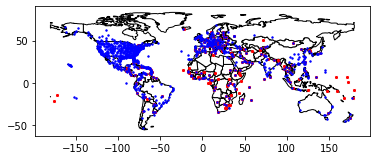

In [41]:
ax = world.plot(color='white', edgecolor='black')
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
cities.plot(ax=ax, marker='x', color='red', markersize=5)
gdf.plot(ax=ax, color='blue', markersize=2)

plt.show()

In [42]:
gdf.describe()

,Longitude,Latitude
count,912.000000,912.000000
mean,-38.069052,29.554800
std,75.671054,21.269647
min,-162.598999,-53.002601
25%,-92.822798,19.712802
50%,-73.126747,35.978853
75%,13.245325,43.452625
max,177.442995,68.491300


In [43]:
#US state bounds ref: https://pubs.usgs.gov/of/2006/1251/Baselayers/state_bounds-faq.html

In [58]:
us = []
boundLon = np.array([-124.327629, -66.885666])
boundLat = np.array([25.837377,49.384359])
count = 0
for i in dfcoord.iterrows():
    if boundLon[0] <= i[1][0]<= boundLon[1]:
        if boundLat[0] <= i[1][1] <= boundLat[1]:
            count = count +1
            us.extend([[i[1][0],i[1][1]]])
            t = np.array(us) # t - array transformed in numpy
print('Points inside US:',count)
#print(t)

Points inside US: 368


In [45]:
df_coord_NorthAmerica = pd.DataFrame(t, columns=['Longitude', 
                      'Latitude'])
df_coord_NorthAmerica

,Longitude,Latitude
0,-82.407402,36.475198
1,-113.525674,31.356204
2,-73.778899,40.639799
3,-74.168699,40.692500
4,-118.407997,33.942501
...,...,...
363,-109.510002,40.440897
364,-104.193000,47.706901
365,-89.337098,31.467100
366,-96.918504,28.852602


Points_plotted: 368


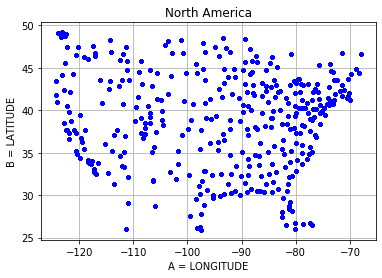

In [46]:
NAmerica = plt.axes()
NAmerica.set(xlabel='A = LONGITUDE', ylabel='B = LATITUDE',
       title='North America')
NAmerica.grid()

#fig.savefig("test.png")
count = 0
for i in df_coord_NorthAmerica.Longitude:
    NAmerica.plot(df_coord_NorthAmerica.Longitude,df_coord_NorthAmerica.Latitude, '.', color='blue')
    count = count +1
print('Points_plotted:',count) #check number points plotted

In [47]:
gdf2 = geopandas.GeoDataFrame(
      df_coord_NorthAmerica, geometry=geopandas.points_from_xy( 
              df_coord_NorthAmerica.Longitude, df_coord_NorthAmerica.Latitude))

In [48]:
print(gdf2.head(15))

     Longitude   Latitude                     geometry
0   -82.407402  36.475198   POINT (-82.40740 36.47520)
1  -113.525674  31.356204  POINT (-113.52567 31.35620)
2   -73.778899  40.639799   POINT (-73.77890 40.63980)
3   -74.168699  40.692500   POINT (-74.16870 40.69250)
4  -118.407997  33.942501  POINT (-118.40800 33.94250)
5   -73.872594  40.777200   POINT (-73.87259 40.77720)
6   -87.904801  41.978601   POINT (-87.90480 41.97860)
7  -115.151998  36.080103  POINT (-115.15200 36.08010)
8   -84.428098  33.636702   POINT (-84.42810 33.63670)
9   -81.308996  28.429398   POINT (-81.30900 28.42940)
10 -122.375002  37.618999  POINT (-122.37500 37.61900)
11  -71.005204  42.364299   POINT (-71.00520 42.36430)
12  -76.668296  39.175399   POINT (-76.66830 39.17540)
13  -97.038000  32.896802   POINT (-97.03800 32.89680)
14 -122.308997  47.449001  POINT (-122.30900 47.44900)


In [49]:
usa_url = "https://raw.githubusercontent.com/kjhealy/us-county/master/data/geojson/gz_2010_us_040_00_5m.json"
country = geopandas.read_file(usa_url)

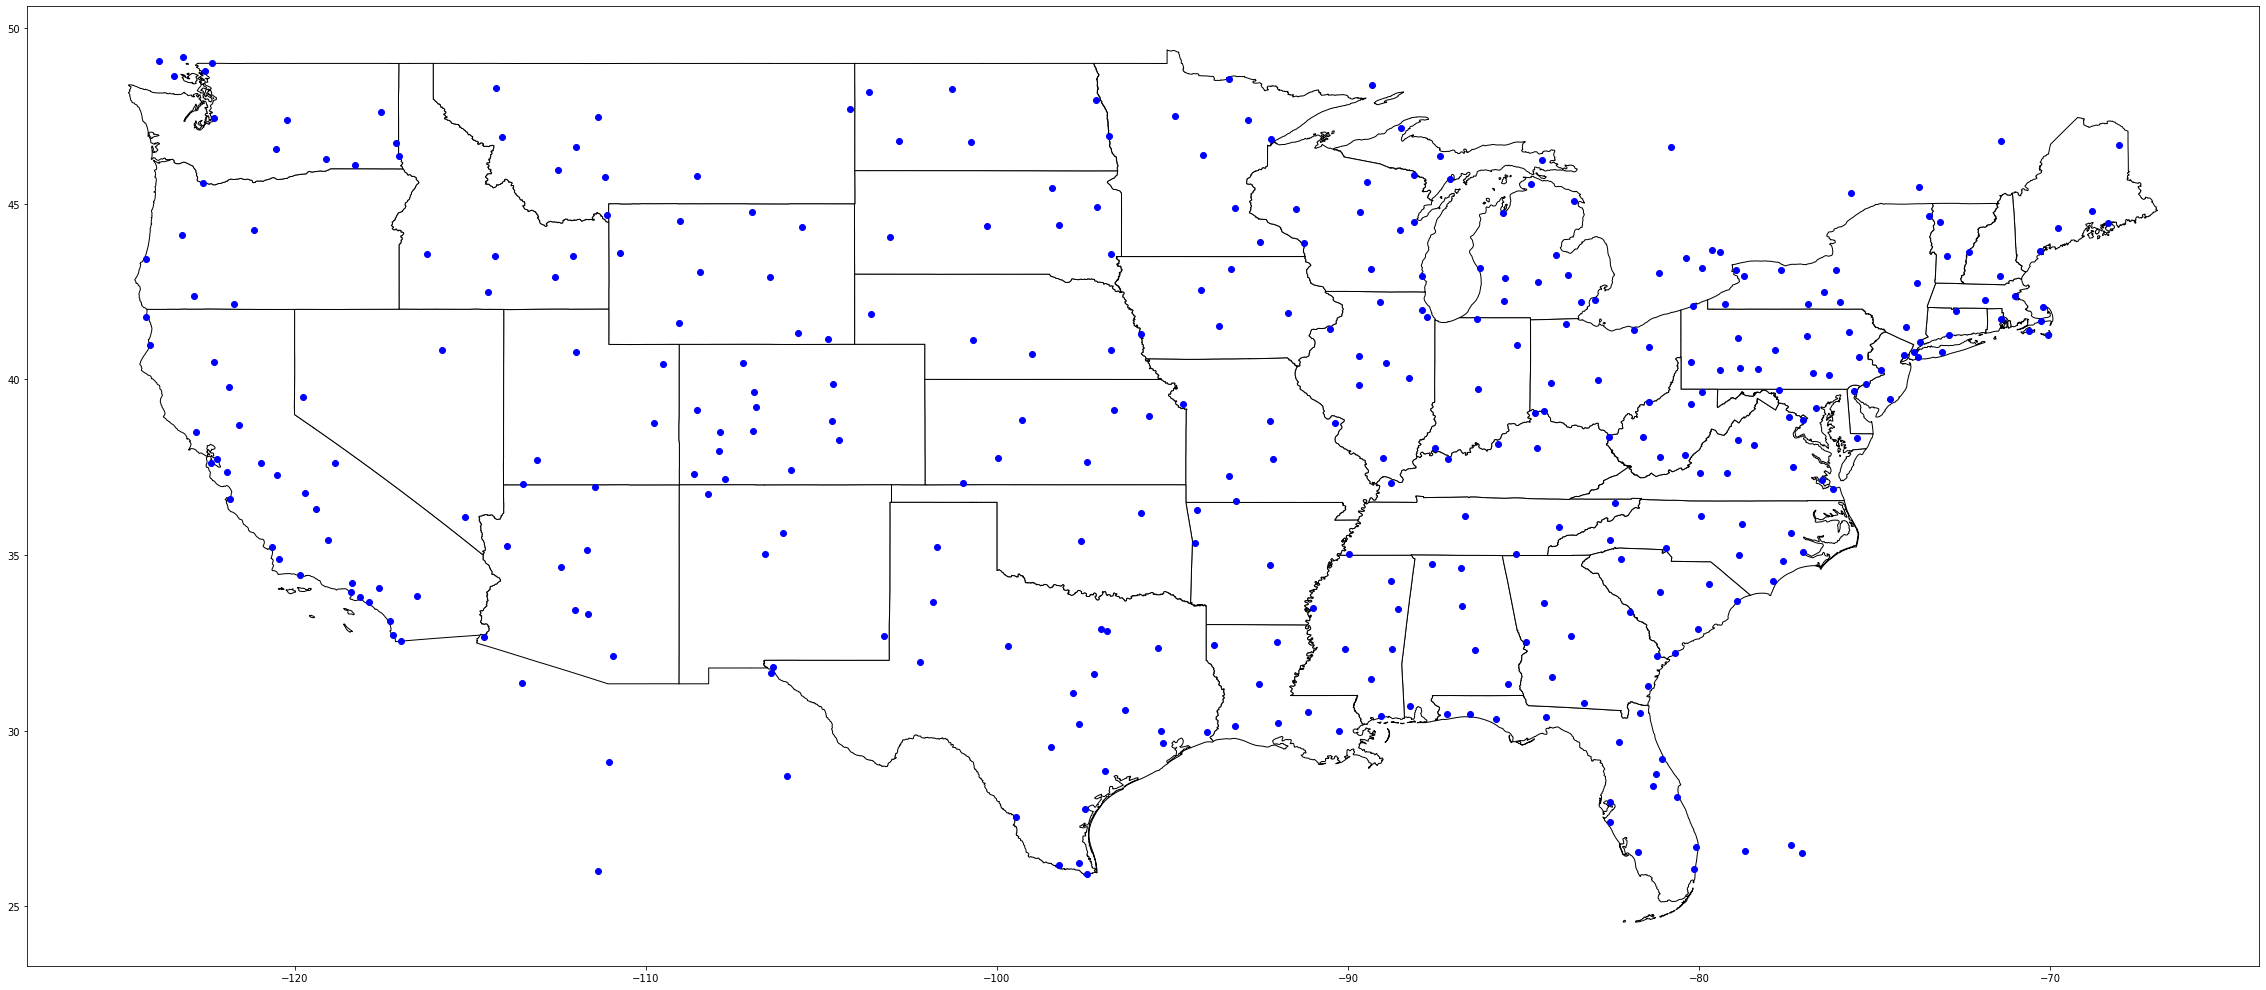

In [50]:
ax = country[country['NAME'].isin(
    ['Alaska','Hawaii','Puerto Rico']) == False].plot(figsize=(40,80), color='white', edgecolor='black')
gdf2.plot(ax=ax, color='blue')
plt.show()

In [51]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [52]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [53]:
locations = gdf2[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
#len(locationlist)
#locationlist[0]

In [57]:
# create map of Toronto using latitude and longitude values

map_NewYork = folium.Map(location=[43.76, -79.39],  zoom_start=12)
i = 0
for point in range(0,len(locationlist)):
    folium.CircleMarker(locationlist[point],
        radius=5,        
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8).add_to(map_NewYork)
map_NewYork #Rolling the mouse you can see other airports
# I couldnt see on Github the map(guess the map is dynamic).. but you can download and see for yourself ;)

#### Each point is an "Airport" in the world :)